<a href="https://colab.research.google.com/github/Smehta1234/make_circles_pytorch/blob/main/make_circles_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000
x, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)
print(x.shape)
print(y.shape)

(1000, 2)
(1000,)


In [ ]:
import pandas as pd
df = pd.DataFrame(x, columns=['x1', 'x2'])
df['y'] = y
df.head()

,x1,x2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


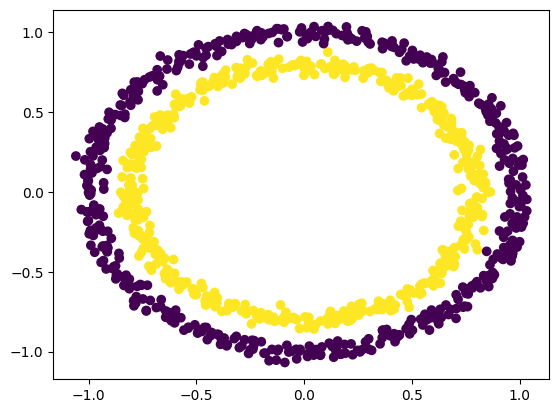

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['x1'], df['x2'], c=df['y'])


In [ ]:
import torch

In [ ]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)


(800, 200, 800, 200)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [ ]:
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
class CircleModelv0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(F.relu(self.layer_1(x)))

model_0 = CircleModelv0().to(device)
model_0

CircleModelv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
untrained_preds = model_0(x_test.to(device))
len(untrained_preds)

200

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69617 | Acc: 53.87% | Test Loss: 0.69868 | Test Acc: 54.50%
Epoch: 10 | Loss: 0.69472 | Acc: 52.38% | Test Loss: 0.69725 | Test Acc: 51.00%
Epoch: 20 | Loss: 0.69401 | Acc: 52.00% | Test Loss: 0.69652 | Test Acc: 48.50%
Epoch: 30 | Loss: 0.69363 | Acc: 51.12% | Test Loss: 0.69611 | Test Acc: 48.00%
Epoch: 40 | Loss: 0.69341 | Acc: 50.88% | Test Loss: 0.69586 | Test Acc: 50.00%
Epoch: 50 | Loss: 0.69327 | Acc: 51.00% | Test Loss: 0.69568 | Test Acc: 47.50%
Epoch: 60 | Loss: 0.69318 | Acc: 51.25% | Test Loss: 0.69555 | Test Acc: 47.00%
Epoch: 70 | Loss: 0.69312 | Acc: 51.00% | Test Loss: 0.69546 | Test Acc: 48.50%
Epoch: 80 | Loss: 0.69308 | Acc: 51.25% | Test Loss: 0.69538 | Test Acc: 47.00%
Epoch: 90 | Loss: 0.69305 | Acc: 50.62% | Test Loss: 0.69531 | Test Acc: 45.50%


In [ ]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists')
else:
  print('Downloading helper_functions.py')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary


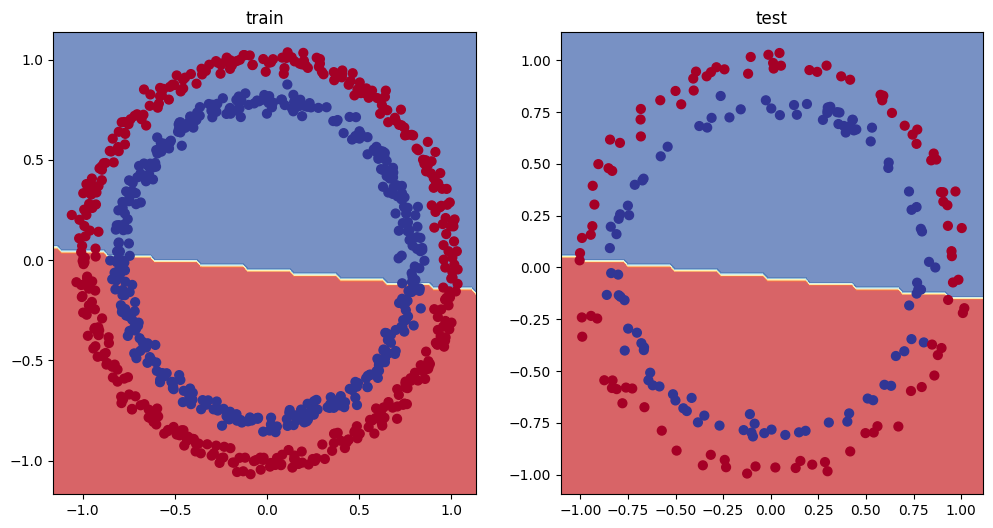

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model_0, x_test,y_test)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden1 = nn.Linear(2, 4)  # First hidden layer with 4 neurons
        self.hidden2 = nn.Linear(4, 2)  # Second hidden layer with 2 neurons
        self.output = nn.Linear(2, 1)  # Output layer
        self.activation = nn.Tanh()  # Activation function: Tanh

    def forward(self, x):
        x = self.activation(self.hidden1(x))
        x = self.activation(self.hidden2(x))
        x = self.output(x)
        return x

# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork().to(device)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return (correct / len(y_pred)) * 100

# Training loop
epochs = 100
batch_size = 10  # As per the image

torch.manual_seed(42)
torch.cuda.manual_seed(42)

x_train, x_test, y_train, y_test = x_train.to(device), x_test.to(device), y_train.to(device), y_test.to(device)

for epoch in range(epochs):
    model.train()
    for i in range(0, len(x_train), batch_size):
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        y_logits = model(x_batch).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits))

        loss = loss_fn(y_logits, y_batch)
        acc = accuracy_fn(y_true=y_batch, y_pred=y_pred)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        test_logits = model(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69771 | Acc: 50.00% | Test Loss: 0.69954 | Test Acc: 50.00%
Epoch: 10 | Loss: 0.69436 | Acc: 50.00% | Test Loss: 0.69423 | Test Acc: 48.00%
Epoch: 20 | Loss: 0.69667 | Acc: 50.00% | Test Loss: 0.69412 | Test Acc: 48.50%
Epoch: 30 | Loss: 0.69888 | Acc: 50.00% | Test Loss: 0.69264 | Test Acc: 48.00%
Epoch: 40 | Loss: 0.70040 | Acc: 50.00% | Test Loss: 0.68863 | Test Acc: 49.00%
Epoch: 50 | Loss: 0.69757 | Acc: 50.00% | Test Loss: 0.67902 | Test Acc: 53.50%
Epoch: 60 | Loss: 0.67081 | Acc: 60.00% | Test Loss: 0.65320 | Test Acc: 65.50%
Epoch: 70 | Loss: 0.50717 | Acc: 100.00% | Test Loss: 0.54189 | Test Acc: 95.50%
Epoch: 80 | Loss: 0.25648 | Acc: 100.00% | Test Loss: 0.33285 | Test Acc: 98.50%
Epoch: 90 | Loss: 0.12831 | Acc: 100.00% | Test Loss: 0.19921 | Test Acc: 99.00%


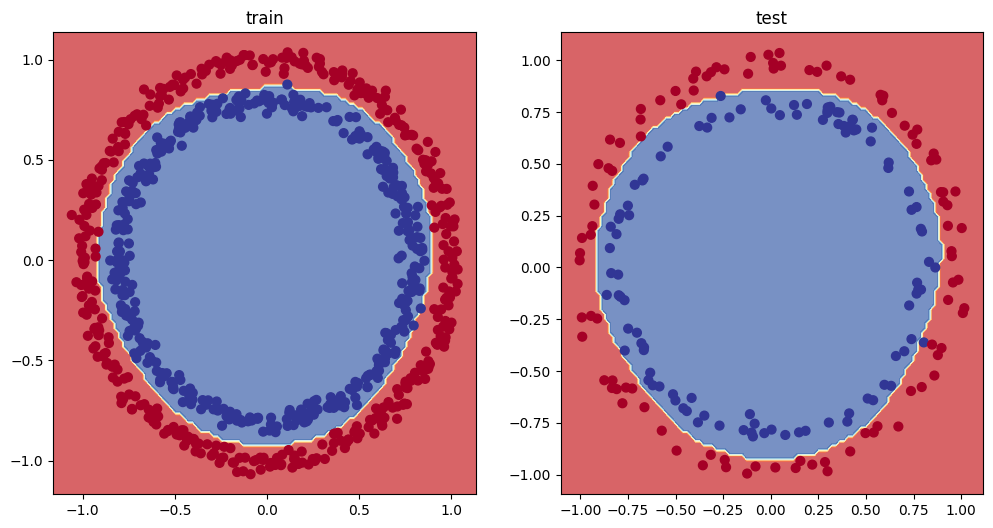

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model, x_test,y_test)